In [1]:
import sys
import pandas as pd
import numpy
import matplotlib


In [78]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas as pd
!{sys.executable} -m pip install os
!{sys.executable} -m pip install numpy

In [2]:
df = pd.read_csv('data/washdash-download.csv')

In [3]:
df.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Sanitation,2000,39.38183,9.028221e+06,Basic service
1,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Limited service
2,sdg,Australia and New Zealand,total,Sanitation,2000,0.00000,0.000000e+00,Open defecation
3,sdg,Australia and New Zealand,total,Sanitation,2000,60.61081,1.389493e+07,Safely managed service
4,sdg,Australia and New Zealand,total,Sanitation,2000,0.00736,1.686995e+03,Unimproved


In [4]:
df['Service Type']

0           Sanitation
1           Sanitation
2           Sanitation
3           Sanitation
4           Sanitation
             ...      
3750    Drinking water
3751    Drinking water
3752    Drinking water
3753    Drinking water
3754    Drinking water
Name: Service Type, Length: 3755, dtype: object

In [5]:
waterdf = df[df['Service Type'] == 'Drinking water']

In [7]:
waterdf.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
5,sdg,Australia and New Zealand,total,Drinking water,2000,99.76073,2.286998e+07,At least basic
6,sdg,Australia and New Zealand,rural,Drinking water,2000,99.20021,3.516825e+06,At least basic
7,sdg,Australia and New Zealand,urban,Drinking water,2000,7.91597,1.534088e+06,Basic service
8,sdg,Australia and New Zealand,total,Drinking water,2000,0.00000,0.000000e+00,Limited service
9,sdg,Australia and New Zealand,rural,Drinking water,2000,0.00000,0.000000e+00,Limited service


In [8]:
waterdf_total = waterdf[waterdf['Residence Type'] == 'total']

In [9]:
waterdf_total.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
5,sdg,Australia and New Zealand,total,Drinking water,2000,99.76073,2.286998e+07,At least basic
8,sdg,Australia and New Zealand,total,Drinking water,2000,0.00000,0.000000e+00,Limited service
12,sdg,Australia and New Zealand,total,Drinking water,2000,0.05244,1.202292e+04,Surface water
15,sdg,Australia and New Zealand,total,Drinking water,2000,0.18683,4.283043e+04,Unimproved
23,sdg,Australia and New Zealand,total,Drinking water,2001,99.75993,2.312083e+07,At least basic


In [10]:
waterdf_total.to_csv('data/water_data.csv')

In [11]:
waterdf_total = waterdf_total.drop(['Population', 'Type', 'Residence Type', 'Service Type'], axis =1)
waterdf_total.head()

,Region,Year,Coverage,Service level
5,Australia and New Zealand,2000,99.76073,At least basic
8,Australia and New Zealand,2000,0.00000,Limited service
12,Australia and New Zealand,2000,0.05244,Surface water
15,Australia and New Zealand,2000,0.18683,Unimproved
23,Australia and New Zealand,2001,99.75993,At least basic


In [12]:
waterdf_spread = pd.pivot_table(waterdf_total, values = 'Coverage', index=['Region','Year'], columns = 'Service level').reset_index()
waterdf_spread.head()

Service level,Region,Year,At least basic,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76073,NaN,0.0,NaN,0.05244,0.18683
1,Australia and New Zealand,2001,99.75993,NaN,0.0,NaN,0.05288,0.18719
2,Australia and New Zealand,2002,99.76086,NaN,0.0,NaN,0.05244,0.18670
3,Australia and New Zealand,2003,99.77940,NaN,0.0,NaN,0.04551,0.17509
4,Australia and New Zealand,2004,99.79771,NaN,0.0,NaN,0.03870,0.16359


In [13]:
waterdf_spread.loc[waterdf_spread['Basic service'].isnull(), 'Basic service'] = waterdf_spread['At least basic']
waterdf_spread = waterdf_spread.drop(['At least basic'], axis = 1)
waterdf=waterdf_spread
waterdf.head()

Service level,Region,Year,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76073,0.0,NaN,0.05244,0.18683
1,Australia and New Zealand,2001,99.75993,0.0,NaN,0.05288,0.18719
2,Australia and New Zealand,2002,99.76086,0.0,NaN,0.05244,0.18670
3,Australia and New Zealand,2003,99.77940,0.0,NaN,0.04551,0.17509
4,Australia and New Zealand,2004,99.79771,0.0,NaN,0.03870,0.16359


In [14]:
waterdf['Region'].unique()

array(['Australia and New Zealand', 'Central and Southern Asia',
       'Eastern and South-Eastern Asia', 'Europe and Northern America',
       'Latin America and the Caribbean',
       'Northern Africa and Western Asia', 'Oceania',
       'Sub-Saharan Africa'], dtype=object)

In [16]:
waterdf_aus = waterdf[waterdf['Region'] == 'Australia and New Zealand']
waterdf_csa = waterdf[waterdf['Region'] == 'Central and Southern Asia']
waterdf_lac = waterdf[waterdf['Region'] == 'Latin America and the Caribbean']
waterdf_nawa = waterdf[waterdf['Region'] == 'Northern Africa and Western Asia']
waterdf_oce = waterdf[waterdf['Region'] == 'Oceania']
waterdf_ssa = waterdf[waterdf['Region'] == 'Sub-Saharan Africa']

In [17]:
import matplotlib.pyplot as plt

In [18]:
waterdf_aus.head()

Service level,Region,Year,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76073,0.0,NaN,0.05244,0.18683
1,Australia and New Zealand,2001,99.75993,0.0,NaN,0.05288,0.18719
2,Australia and New Zealand,2002,99.76086,0.0,NaN,0.05244,0.18670
3,Australia and New Zealand,2003,99.77940,0.0,NaN,0.04551,0.17509
4,Australia and New Zealand,2004,99.79771,0.0,NaN,0.03870,0.16359


In [23]:
waterdf_aus

Service level,Region,Year,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76073,0.0,NaN,0.05244,0.18683
1,Australia and New Zealand,2001,99.75993,0.0,NaN,0.05288,0.18719
2,Australia and New Zealand,2002,99.76086,0.0,NaN,0.05244,0.18670
3,Australia and New Zealand,2003,99.77940,0.0,NaN,0.04551,0.17509
4,Australia and New Zealand,2004,99.79771,0.0,NaN,0.03870,0.16359
5,Australia and New Zealand,2005,99.81579,0.0,NaN,0.03201,0.15221
6,Australia and New Zealand,2006,99.83363,0.0,NaN,0.02543,0.14095
7,Australia and New Zealand,2007,99.85130,0.0,NaN,0.01894,0.12976
8,Australia and New Zealand,2008,99.86884,0.0,NaN,0.00000,0.13116
9,Australia and New Zealand,2009,99.88629,0.0,NaN,0.00000,0.11371


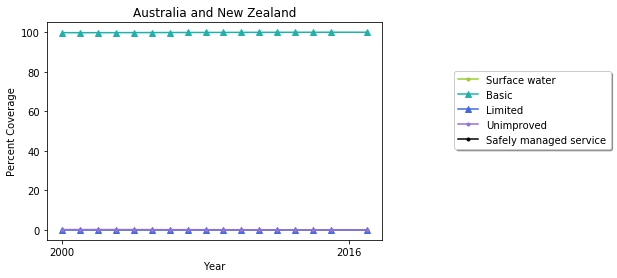

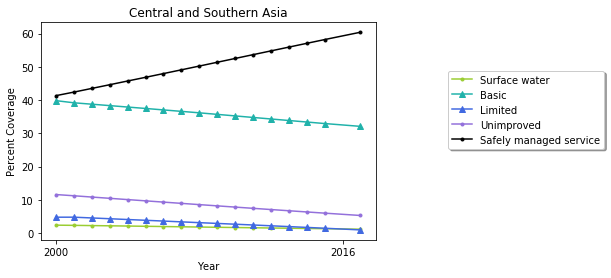

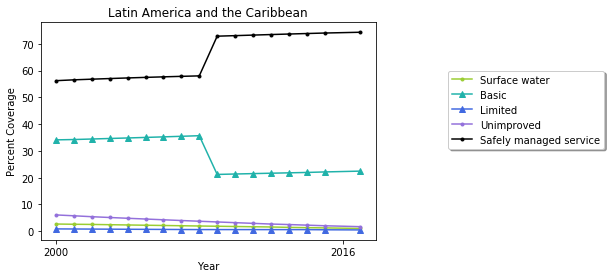

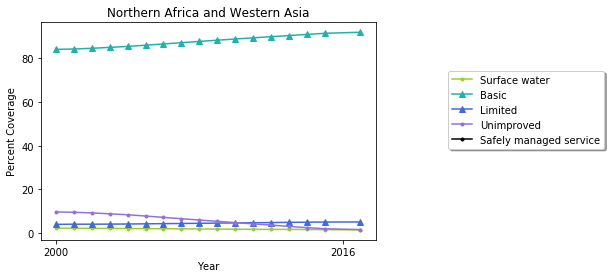

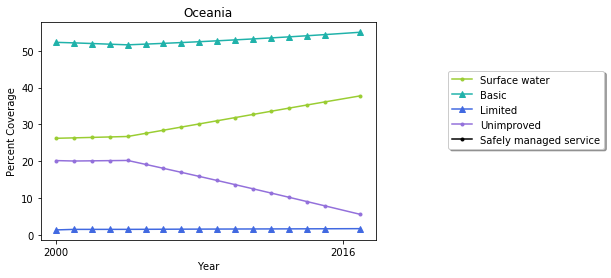

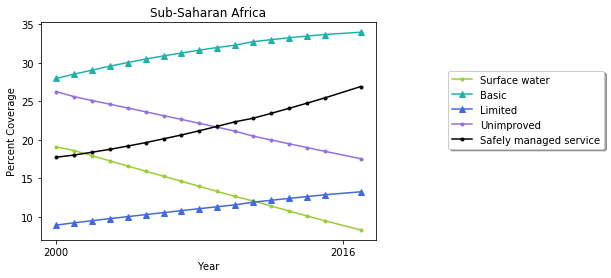

In [24]:
from matplotlib import pyplot
sdg_regions = [waterdf_aus, waterdf_csa, waterdf_lac, waterdf_nawa, waterdf_oce, waterdf_ssa]
sdg_region_title = ['Australia and New Zealand', 
                   'Central and Southern Asia',
                   'Latin America and the Caribbean', 
                   'Northern Africa and Western Asia', 
                   'Oceania', 
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
        title = sdg_region_title[index]
        
        plt.plot(region['Year'], region['Surface water'], fillstyle = 'full', color = 'yellowgreen', marker = '.', label = "Surface water")
        plt.plot(region['Year'], region['Basic service'], fillstyle = 'full',color = 'lightseagreen', marker = '^', label = "Basic")
        plt.plot(region['Year'], region['Limited service'], fillstyle = 'full',color = 'royalblue', marker = '^', label = 'Limited')
        plt.plot(region['Year'], region['Unimproved'],fillstyle = 'full', color = 'mediumpurple', marker ='.', label = 'Unimproved')
        plt.plot(region['Year'], region['Safely managed service'], fillstyle = 'full',color = 'black', marker = '.', label = "Safely managed service")
        
        plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xticks(range(2000,2017,16))
        plt.xlabel('Year')
        plt.ylabel('Percent Coverage')
        plt.title(title)
        plt.show()
        
        image_title =  'Plot of Water Service Levels Across the world'
        
        index += 1

In [25]:
import numpy as np

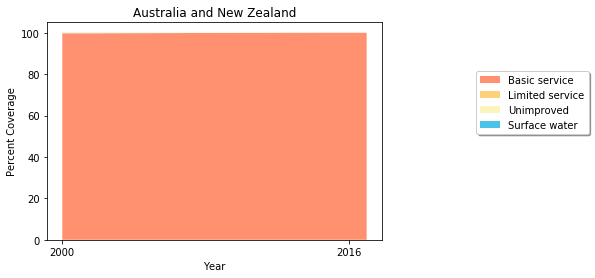

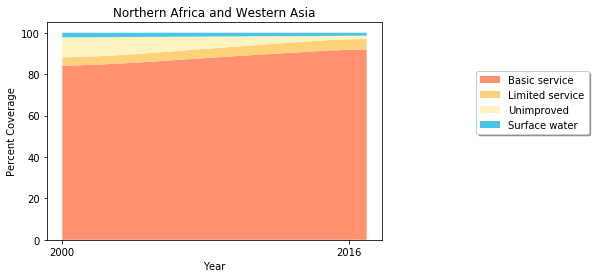

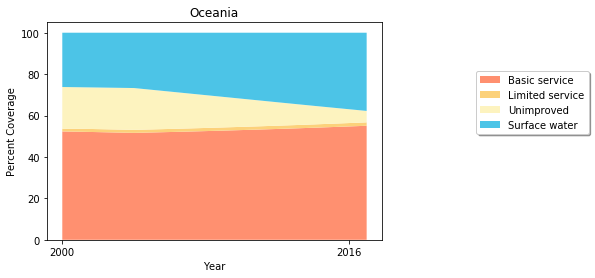

In [26]:
from matplotlib import pyplot
sdg_regions = [waterdf_aus,waterdf_nawa, waterdf_oce]
sdg_region_title = ['Australia and New Zealand', 
                   'Northern Africa and Western Asia', 
                   'Oceania']
index = 0
for region in sdg_regions: 
    title = sdg_region_title[index]
    x = region['Year']
    y2 = region['Basic service']
    y3 = region['Limited service']
    y4 = region['Unimproved']
    y5 = region['Surface water']
    colors=['#FF9070','#FCD17A','#FDF3BF', '#4CC4E7','#4D8CBF']
        
    y = np.vstack([y2,y3,y4,y5])

    labels = ["Basic service", "Limited service", "Unimproved", "Surface water"]
    fig, ax = plt.subplots()
    ax.stackplot(x,y2,y3,y4,y5, labels=labels, colors=colors)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.xticks(range(2000,2017,16))
    plt.xlabel('Year')
    plt.ylabel('Percent Coverage')
    plt.title(title)
    plt.show()
    index += 1

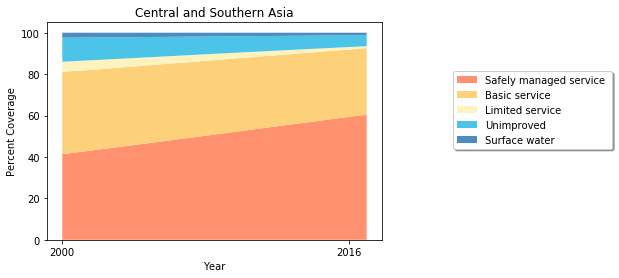

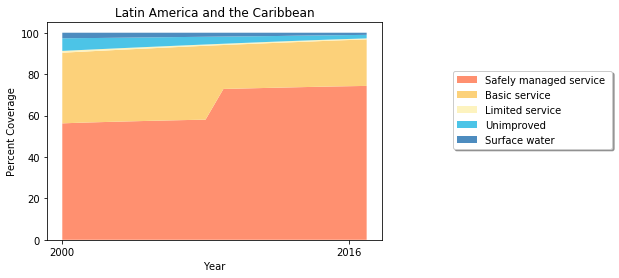

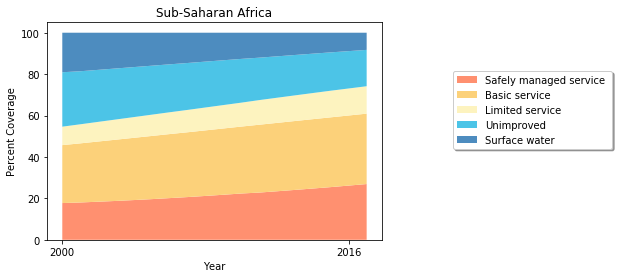

In [42]:
from matplotlib import pyplot
sdg_regions = [waterdf_csa, waterdf_lac, waterdf_ssa]
sdg_region_title = [
                   'Central and Southern Asia',
                   'Latin America and the Caribbean',
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
    title = sdg_region_title[index]
    x = region['Year']
    y1 = region['Safely managed service']
    y2 = region['Basic service']
    y3 = region['Limited service']
    y4 = region['Unimproved']
    y5 = region['Surface water']

    y = np.vstack([y1,y2,y3,y4,y5])

    labels = ["Safely managed service ", "Basic service", "Limited service", "Unimproved", 
        "Surface water"]    

    colors=['#FF9070','#FCD17A','#FDF3BF', '#4CC4E7','#4D8CBF']
    fig, ax = plt.subplots()
    ax.stackplot(x,y1,y2,y3,y4,y5, labels=labels, colors=colors)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.xticks(range(2000,2017,16))
    plt.xlabel('Year')
    plt.ylabel('Percent Coverage')
    plt.title(title)
    plt.show()
    index += 1

Text(0.5, 0, 'Year')

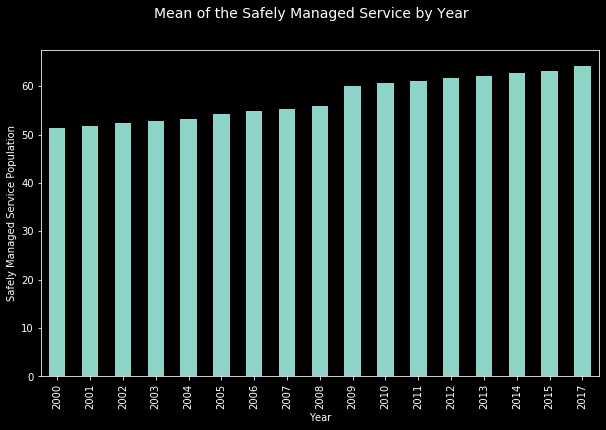

In [21]:
plt.style.use('dark_background')

waterdf.groupby('Year')['Safely managed service'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the Safely Managed Service by Year', fontsize=14)
plt.ylabel('Safely Managed Service Population')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

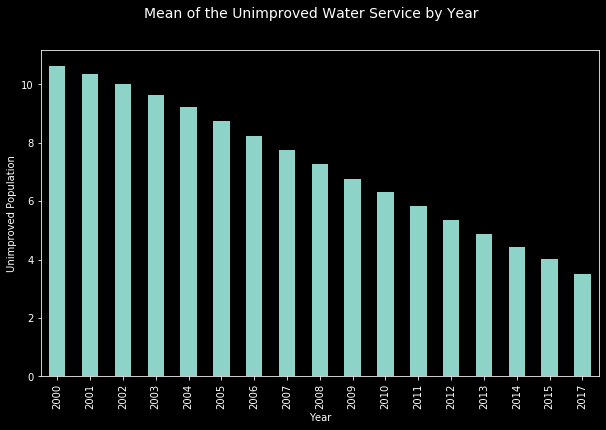

In [23]:
waterdf.groupby('Year')['Unimproved'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the Unimproved Water Service by Year', fontsize=14)
plt.ylabel('Unimproved Population')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

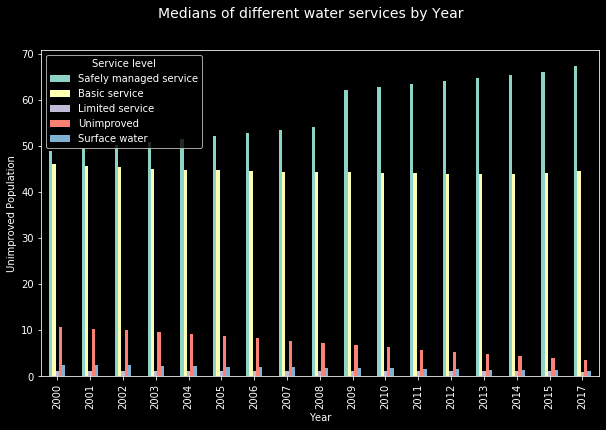

In [27]:
waterdf.groupby('Year')['Safely managed service', 'Basic service', 'Limited service','Unimproved', 'Surface water'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Medians of different water services by Year', fontsize=14)
plt.ylabel('Unimproved Population')
plt.xlabel('Year')

In [ ]:
# lets try to look at the correlations between these drinking water service types
